## Week17_HW (Bagging & Boosting)

## 1.What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class. 

#### Inductive Reasoning

* In Inductive reasoning, we go from the specific to the general. We make many observations, discern a pattern, make a generalization, and infer an explanation or a theory. Inductive reasoning does not guarantee that the conclusion will be true. 

* For example,
                 Penguins are birds. 
                 Penguins can't fly. 
                 Therefore, all birds can't fly.
                

#### Deductive reasoning 

* In deductive reasoning there is a first premise, then a second premise and finally an inference (a conclusion based on reasoning and evidence). 

* For example, 
                All spiders have eight legs. 
                A tarantula is a spider. 
                Therefore, tarantulas have eight legs.

## 2. Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

* I am taking Abalone Datset out of the three datasets.

## Abalone Dataset description
 
* The dataset used is Abalone Data set. This dataset is from UCI Machine Learning Repository. The source of the data is  in this link https://archive.ics.uci.edu/ml/datasets/Abalone.

* In this task with the dataset, the age of the abalone should be predicted with the physical measurements. In general, the age is determined by cutting the shell through the cone, staining after that, and counting the number of rings present through the microscope.

* This dataset has 4177 samples. There are no missing values in this data set as per the description given. The missing values are already removed from the original samples and the ranges of continuous values are scaled with ANN.

## Attributes

* There are 9 attributes. These attributes are the columns of the data set. The age column is not included in the dataset. But in the description it is given that age = Rings + 1.5.

    * Sex – The data type is categorical and there are three types in this data. M, F and I.
    * Length – It is the continuous datatype and the units are in mm. It is the longest shell measurement.
    * Diameter – It is also continuous datatype and the units are in mm. It is the perpendicular to length.
    * Height – It is a continuous data type. It is numerical just like diameter and length. Its units are in mm and it is the meat in the shell.
    * Whole weight – A continuous data measured in grams. It is the weight of whole abalone.
    * Shucked weight – It is same as whole weight, continuous data, measured in grams and it is the weight of the meat.
    * Viscera weight – It is also continuous data, measured in grams and it is the git weight after bleeding.
    * Shell weight – It is the weight of the shell after being dried. It is continuously varying data.
    * Rings – It is an integer and adding 1.5 to rings gives the age of the abalone.

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
column_list = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
abalone_df = pd.read_csv("abalone.data",names = column_list)
abalone_df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Preprocessing

   Preprocessing is an initial step when we use Machine Learning. After loading our dataset, we have to prepare(cleaning and organizing) our data to make it suitable for Machine learning models. Some Preprocessing steps are:

   * Cleaning null values,handling missing datas, removing weird symbols..
   * Standardizing our dataset, Scaling the columns
   * Converting categorical value columns into numerical values.

In [3]:
# Checking Nans in the dataset
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [4]:
abalone_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# It seems like we have some zeros in Height column. Because minimum height value is 0.
abalone_df[abalone_df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [6]:
# replacing 0s with it mean
abalone_df['Height'] = abalone_df['Height'].replace(0,np.mean(abalone_df['Height']))

In [7]:
abalone_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Feature Engineering - Age column

* In the dataset they didn't add age column. Information provided for age column is Rings + 1.5 gives the age in years. Adding output column age in the dataframe

In [8]:
abalone_df['Age'] = abalone_df['Rings'] + 1.5
abalone_df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [9]:
# Inorder to use machine learning techniques we need to convert categorical columns into numeric. Our Sex column is categorical. 

sex_enc = pd.get_dummies(abalone_df['Sex'])
sex_enc

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [10]:
abalone_df = pd.concat([abalone_df,sex_enc],axis = 1)
abalone_df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1,0,0


In [11]:
# Dropping categorical Sex column

abalone_df = abalone_df.drop('Sex',axis = 1)

#### Dropping Rings column

*  I have created Age column using Rings column. So Rings has a 1:1 correlation with Age it's basically like using the age column to predict the age column. So I am dropping Rings column from dataframe.

In [12]:
abalone_df = abalone_df.drop('Rings',axis = 1)

In [13]:
# checking correlation with age and other columns
correlation = abalone_df.corr()
correlation['Age']

Length            0.556720
Diameter          0.574660
Height            0.557502
Whole Weight      0.540390
Shucked Weight    0.420884
Viscera Weight    0.503819
Shell Weight      0.627574
Age               1.000000
F                 0.250279
I                -0.436063
M                 0.181831
Name: Age, dtype: float64

In [ ]:
# There are more columns strongly correlated with Age. Only Sex column has weak relationship with Age column.

### Summary about preprocessing

* Created Age column based on the requirements from the data description.(**Feature Engineering**)
* Found that 2 rows of Height column contains 0s and imputed with its mean.(**Imputing Nulls**)
* Encoded Sex categorical column into numeric column.(**Encoding**)

### Preprocessing steps which I didn't use for this dataset.

* Since they already removed null values from the dataset, I didn't clean Nans here. (**No cleaning Nans**)
* Dataset looks normally distributed. They already scaled the data. (**No standardization**)

## 3.Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.


Our predicted column is a continuos variable. So this prediction will come under **regression supervised learning**. So I will be using Decision Tree Regressor. My performance metric is Root Mean Squared Error(RMSE)

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

In [16]:
X = abalone_df.drop('Age',axis = 1) 
y = abalone_df['Age']
              
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

# creating an object for Regressor
DTR = DecisionTreeRegressor(random_state = 6)

# fitting the model
DTR.fit(X_train,y_train)

# predicting output
y_pred = DTR.predict(X_test)

# calculating MSE
mse_DTR = MSE(y_test,y_pred)
RMSE_DTR = mse_DTR**(1/2)

print("RMSE from Decision Tree Regressor: ", RMSE_DTR.round(2))

RMSE from Decision Tree Regressor:  2.96


#### Hyper parameter tuning to decrease RMSE

In [39]:
from sklearn.model_selection import GridSearchCV

param_dict = {'criterion': ['squared_error','absolute_error','poisson'],
              'splitter': ['best','random'],
              'max_depth': [2,3,4],
              'min_samples_leaf':np.arange(1,11),
              'max_features':np.arange(1,11)}

grid = GridSearchCV(estimator=DTR,param_grid = param_dict, cv=5 )
grid.fit(X_tr_scale,y_train)
print("Best parameters for Decision Tree Regressor: ",grid.best_params_)

Best parameters for Decision Tree Regressor:  {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 10, 'splitter': 'best'}


In [ ]:
# I did grid search Cross validation to get best hyperparameters.Now I am going to replace those values in my regressor.

In [40]:
DTR = DecisionTreeRegressor(criterion='squared_error' ,
                            splitter='best',
                            max_depth=4,
                            min_samples_leaf=10,
                            max_features=10,
                            random_state = 6)

# fitting the model
DTR.fit(X_train,y_train)

# predicting output
y_pred = DTR.predict(X_test)

# calculating MSE
mse_DTR = MSE(y_test,y_pred)
RMSE_DTR = mse_DTR**(1/2)

print("RMSE from Decision Tree Regressor: ", RMSE_DTR.round(2))

RMSE from Decision Tree Regressor:  2.37


In [17]:
# Our RMSE value is reduced from 2.96 to 2.37 after hyper parameter tuning.

## 4.Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

* For the same data, I am going to use bagging technique which is Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

# creating an object for Regressor
RFR = RandomForestRegressor(random_state = 6)

# fitting the model
RFR.fit(X_train,y_train)

# predicting output 
y_pred_RFR = RFR.predict(X_test)

#calculating RMSE
MSE_RFR = MSE(y_test,y_pred_RFR)
RMSE_RFR = np.sqrt(MSE_RFR)

print("RMSE from Decision Tree Regressor: ", RMSE_RFR.round(2))

RMSE from Decision Tree Regressor:  2.12


#### Hyper parameter tuning to decrease RMSE

In [42]:
params_RFR = {'n_estimators': [100,350,500],
             'max_features' : ['log2','auto','sqrt'],
             'min_samples_leaf': [2,10,30]}

grid_RFR = GridSearchCV(estimator = RFR, param_grid = params_RFR, cv = 5)

grid_RFR.fit(X_tr_scale,y_train)

print("Best parameters for Random Forest Regressor: ",grid_RFR.best_params_)

Best parameters for Random Forest Regressor:  {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 500}


In [52]:
RFR = RandomForestRegressor(n_estimators = 500,
                            max_features = 'log2' ,
                            min_samples_leaf = 2 ,
                            random_state = 6)
# fitting the model
RFR.fit(X_train,y_train)

# predicting output 
y_pred_RFR = RFR.predict(X_test)

#calculating RMSE
MSE_RFR = MSE(y_test,y_pred_RFR)
RMSE_RFR = np.sqrt(MSE_RFR)

print("RMSE from Decision Tree Regressor: ", RMSE_RFR.round(2))

RMSE from Decision Tree Regressor:  2.1


In [ ]:
# Our rmse value didn't improve much. But still it reduced an amount of 0.02 after hyper parameter tuning. 

## 5.Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 


#### Creating a XGBoost model with Decision tree as base model

* Default booster in xgboost library is decision tree. We don't have to mention booster = gbtree

In [20]:
import xgboost as xgb

# Instantiate the XGBRegressor
XG = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 10, random_state = 6)

# Fit the regressor to the training set
XG.fit(X_train,y_train)

# Predict the labels of the test set
y_pred_XG = XG.predict(X_test)

# Compute the rmse
MSE_XG = MSE(y_test,y_pred_XG)
print("RMSE from XGB Regressor: ",np.sqrt(MSE_XG).round(2))

[19:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE from XGB Regressor:  2.14


#### Creating a XGBoost model with linear regression as base model

In [44]:
# using same splitted data as X_train,X_test,y_train,y_test

# converting training and testing sets into DMatrix objects as it required by the xgboost library
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label = y_test)

param_dict = { 'booster':'gblinear',
             'objective': 'reg:linear'}

# train the model(instead of fitting the model this specific method requires training the model)
xg_linear = xgb.train(params = param_dict, dtrain = DM_train, num_boost_round =10)

# predicting output
y_pred_xg_linear = xg_linear.predict(DM_test)

# Compute the rmse
MSE_xglinear = MSE(y_test,y_pred_xg_linear)
print("RMSE from XGB Regressor: ",np.sqrt(MSE_xglinear).round(2))

[20:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE from XGB Regressor:  2.51


#### Hyper parameter tuning with Grid SearchCV

* XGBoost with  Decision tree as base model performs well than linear regression as base model. So I am tuning hyper parameters for decision tree model to reduce rmse error.

In [51]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'learning_rate': [0.1,0.5,0.9], # how quickly the model fits the residual error using additional base learners.
    'subsample' : [0.3,0.5,0.9], # % of samples used per tree
    'colsample_bytree': [0.3, 0.7], # % of features used per tree  
    'n_estimators': [50],
    'max_depth': [2, 5] # max depth per tree
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5}
Lowest RMSE found:  2.2005861607271466


In [33]:
XG = xgb.XGBRegressor(objective = 'reg:linear', 
                      n_estimators = 50,
                      colsample_bytree = 0.7,
                      max_depth= 4,
                      learning_rate= 0.1,
                      random_state = 6)

# Fit the regressor to the training set
XG.fit(X_train,y_train)

# Predict the labels of the test set
y_pred_XG = XG.predict(X_test)

# Compute the rmse
MSE_XG = MSE(y_test,y_pred_XG)
print("RMSE from XGB Regressor: ",np.sqrt(MSE_XG).round(2))

[19:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE from XGB Regressor:  2.1


In [ ]:
# Before Hyperparameter tuning rmse was 2.14. After Hyperparameter tuning it is 2.11. There is an improvement.

## 6. Which model performed best? What is your performance metric? Why? 

* My performance metric is RMSE. Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data.RMSE tells us the average distance between the predicted values from the model and the actual values in the dataset.



#### Comparing performance 

|       Method             |    RMSE Before Hyperparameter tuning       | RMSE After Hyperparameter tuning |
|:------------------------:|:------------------------------------------:|:--------------------------------:|
| Decision tree Regressor  |                 2.96                       |              2.37                |
| Random Forest Regressor  |                 2.12                       |              2.1                 |
| XGBoost Regressor        |                 2.14                       |              2.11                |                     

* In Random Forest Regressor method we got less RMSE. There isn't much difference in RMSE values in Random Forest & XGBoost methods. But still we got 0.01 value lesser than XGBoost.

* Hence for this problem**Random Forest Model** performs well.

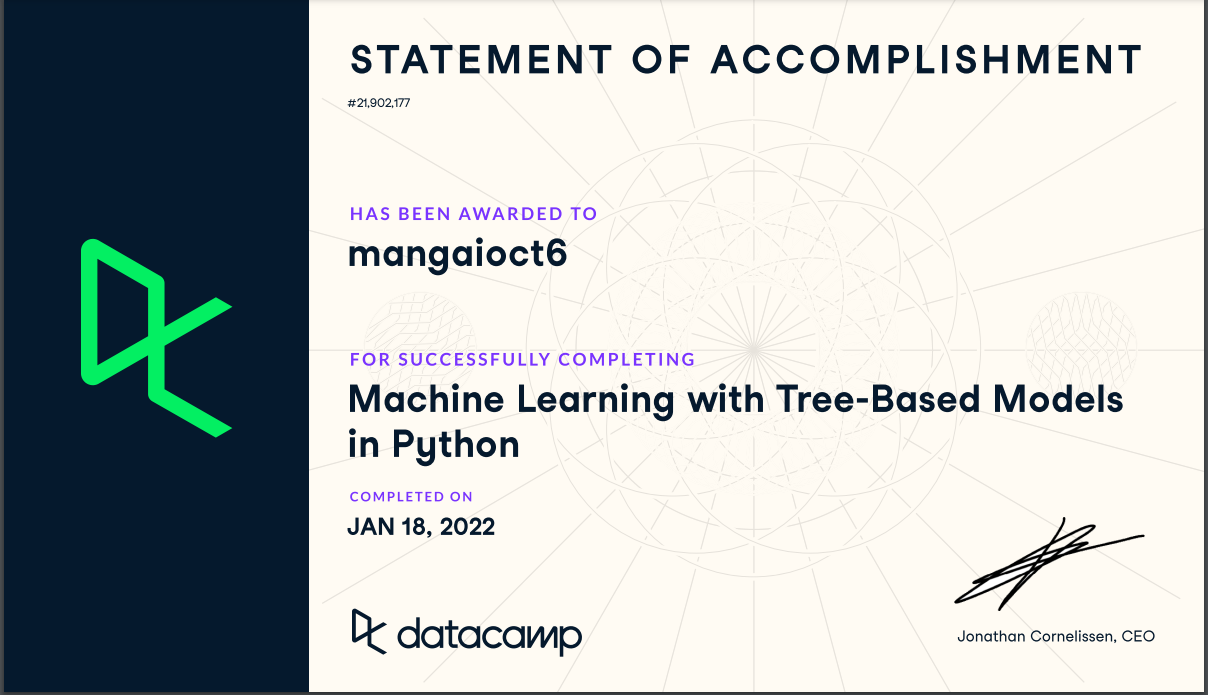